In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/Sharpyyy/Flight_Price_Prediction/master/Data_Train.csv')
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24-03-2019,Banglore,New Delhi,BLR ? DEL,22:20,22-03-2019 01:10,2h 50m,non-stop,No info,3897
1,Air India,01-05-2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,09-06-2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,10-06-2019 04:25,19h,2 stops,No info,13882
3,IndiGo,12-05-2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01-03-2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24-06-2019,Kolkata,Banglore,CCU ? BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12-03-2019,Banglore,New Delhi,BLR ? BOM ? DEL,18:55,13-03-2019 10:25,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01-03-2019,Banglore,New Delhi,BLR ? BOM ? DEL,08:00,02-03-2019 05:05,21h 5m,1 stop,No info,22270
8,Jet Airways,12-03-2019,Banglore,New Delhi,BLR ? BOM ? DEL,08:55,13-03-2019 10:25,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27-05-2019,Delhi,Cochin,DEL ? BOM ? COK,11:25,19:15,7h 50m,1 stop,No info,8625


In [ ]:
data.isnull().any()

Airline            False
Date_of_Journey    False
Source             False
Destination        False
Route               True
Dep_Time           False
Arrival_Time       False
Duration           False
Total_Stops         True
Additional_Info    False
Price              False
dtype: bool

In [ ]:
data[data.Route.isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,06-05-2019,Delhi,Cochin,NaN,09:45,07-05-2019 09:25,23h 40m,NaN,No info,7480


In [ ]:
data[data.Total_Stops.isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,06-05-2019,Delhi,Cochin,NaN,09:45,07-05-2019 09:25,23h 40m,NaN,No info,7480


In [ ]:
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24-03-2019,Banglore,New Delhi,BLR ? DEL,22:20,22-03-2019 01:10,2h 50m,non-stop,No info,3897
1,Air India,01-05-2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,09-06-2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,10-06-2019 04:25,19h,2 stops,No info,13882
3,IndiGo,12-05-2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01-03-2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24-06-2019,Kolkata,Banglore,CCU ? BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12-03-2019,Banglore,New Delhi,BLR ? BOM ? DEL,18:55,13-03-2019 10:25,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01-03-2019,Banglore,New Delhi,BLR ? BOM ? DEL,08:00,02-03-2019 05:05,21h 5m,1 stop,No info,22270
8,Jet Airways,12-03-2019,Banglore,New Delhi,BLR ? BOM ? DEL,08:55,13-03-2019 10:25,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27-05-2019,Delhi,Cochin,DEL ? BOM ? COK,11:25,19:15,7h 50m,1 stop,No info,8625


In [ ]:
# Label encode different attributes
data.Airline = LabelEncoder().fit_transform(data.Airline) 
data.replace(to_replace=['Banglore','Chennai','Cochin','Delhi','Hyderabad','Kolkata','Mumbai','New Delhi'],value=list(range(8)),inplace=True)
data.Total_Stops.replace(['non-stop', '1 stop', '2 stops', '3 stops', '4 stops'],[0,1,2,3,4],inplace=True)
data.Additional_Info = data.Additional_Info.replace(['1 Long layover','1 Short layover', '2 Long layover', 'Business class', 'Change airports', \
                                                     'In-flight meal not included', 'No Info', 'No info', 'No check-in baggage included', \
                                                     'Red-eye flight'],[0,1,2,3,4,5,6,6,7,8])

data.Route = data.Route.str.split('?')

data.Date_of_Journey = pd.to_datetime(data.Date_of_Journey,format="%d-%m-%Y")

# convert Duraction to minutes
data.Duration = data.Duration.apply(lambda x: int(x[:x.find('h')])*60 + int(x[x.find(' ') +1:x.find('m')]))


# Convert Dep_Time to 4 different catogories([0,1,2,3] for [0:00-5:59, 6:00-11:59, 12:00-17:59, 18:00-23:59])
data.Dep_Time = data.Dep_Time.apply(lambda x: int(x.split(':')[0]))
data.Dep_Time = data.Dep_Time.replace(list(range(6)),[0]*6)
data.Dep_Time = data.Dep_Time.replace(list(range(6,12)),[1]*6)
data.Dep_Time = data.Dep_Time.replace(list(range(12,18)),[2]*6)
data.Dep_Time = data.Dep_Time.replace(list(range(18,24)),[3]*6)
data.drop(['Arrival_Time'],axis = 1,inplace=True)

In [ ]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price
0,3,2019-03-24,0,7,"[BLR , DEL]",3,170,0,6,3897
1,1,2019-05-01,5,0,"[CCU , IXR , BBI , BLR]",0,445,2,6,7662
2,4,2019-06-09,3,2,"[DEL , LKO , BOM , COK]",1,1159,2,6,13882
3,3,2019-05-12,5,0,"[CCU , NAG , BLR]",3,325,1,6,6218
4,3,2019-03-01,0,7,"[BLR , NAG , DEL]",2,285,1,6,13302
5,8,2019-06-24,5,0,"[CCU , BLR]",1,145,0,6,3873
6,4,2019-03-12,0,7,"[BLR , BOM , DEL]",3,930,1,5,11087
7,4,2019-03-01,0,7,"[BLR , BOM , DEL]",1,1265,1,6,22270
8,4,2019-03-12,0,7,"[BLR , BOM , DEL]",1,1530,1,5,11087
9,6,2019-05-27,3,2,"[DEL , BOM , COK]",1,470,1,6,8625


In [ ]:
# Find the day of the week and also if it is a weekend or not
data['Weekday'] = data.Date_of_Journey.dt.weekday
data['Weekend'] = (data.Weekday > 4)

# Find the month (may be useful)
data['Month'] = data.Date_of_Journey.dt.month
data['DayOfMonth']= data.Date_of_Journey.dt.day

In [ ]:
# Find if the th day is a public holiday and add it to holiday_weekend column
holiday = ['04/03/2019','20/03/2019','21/03/2019','22/03/2019','01/04/2019','05/04/2019','06/04/2019','13/04/2019','14/04/2019','19/04/2019','01/05/2019','07/05/2019','18/05/2019','05/06/2019','06/06/2019']
holiday = pd.to_datetime(holiday,format='%d/%m/%Y')
holiday = holiday + pd.DateOffset(0)
data['Holiday_Weekend'] = (data.Date_of_Journey.isin(holiday) | data.Weekend).map({True:1,False:0})
data.drop(['Weekend'],axis=1,inplace=True)
data.drop(['Date_of_Journey'],axis=1,inplace=True)

In [ ]:
# Remove Source and Destination details from the Route as we already have them
data.Route.apply(lambda x: x.pop(0))
data.Route.apply(lambda x: x.pop(-1))

0         DEL
1         BLR
2         COK
3         BLR
4         DEL
5         BLR
6         DEL
7         DEL
8         DEL
9         COK
10        COK
11        BLR
12        CCU
13        BLR
14        BLR
15        COK
16        COK
17        COK
18        COK
19        COK
20        COK
21        DEL
22        DEL
23        DEL
24        BLR
25        COK
26        COK
27        COK
28        DEL
29        CCU
         ... 
10651     COK
10652     COK
10653     BLR
10654     DEL
10655     HYD
10656     DEL
10657     BLR
10658     DEL
10659     DEL
10660     DEL
10661     COK
10662     BLR
10663     COK
10664     DEL
10665     BLR
10666     COK
10667     DEL
10668     COK
10669     COK
10670     BLR
10671     HYD
10674     DEL
10675     HYD
10676     COK
10677     DEL
10678     BLR
10679     BLR
10680     DEL
10681     DEL
10682     COK
Name: Route, Length: 10462, dtype: object

In [ ]:
data

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Weekday,Month,DayOfMonth,Holiday_Weekend
0,3,0,7,[],3,170,0,6,3897,6,3,24,1
1,1,5,0,"[ IXR , BBI ]",0,445,2,6,7662,2,5,1,1
2,4,3,2,"[ LKO , BOM ]",1,1159,2,6,13882,6,6,9,1
3,3,5,0,[ NAG ],3,325,1,6,6218,6,5,12,1
4,3,0,7,[ NAG ],2,285,1,6,13302,4,3,1,0
5,8,5,0,[],1,145,0,6,3873,0,6,24,0
6,4,0,7,[ BOM ],3,930,1,5,11087,1,3,12,0
7,4,0,7,[ BOM ],1,1265,1,6,22270,4,3,1,0
8,4,0,7,[ BOM ],1,1530,1,5,11087,1,3,12,0
9,6,3,2,[ BOM ],1,470,1,6,8625,0,5,27,0


In [ ]:
data.sort_values(by='Price')

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Weekday,Month,DayOfMonth,Holiday_Weekend
4839,8,6,4,[],3,90,0,6,1759,2,4,3,0
4274,8,6,4,[],3,85,0,6,1759,2,3,27,0
10513,8,6,4,[],0,80,0,6,1759,2,3,27,0
4066,8,6,4,[],3,85,0,6,1759,3,3,21,1
1513,4,6,4,[],0,90,0,5,1840,2,3,27,0
8223,8,6,4,[],3,90,0,7,1965,6,5,12,1
2102,8,6,4,[],2,90,0,7,1965,3,6,27,0
2724,8,6,4,[],3,90,0,7,1965,1,5,21,0
655,8,6,4,[],2,90,0,7,1965,4,5,3,0
10433,8,6,4,[],0,90,0,7,1965,5,5,18,1


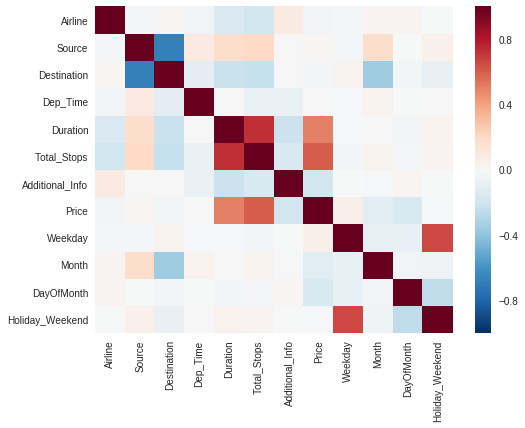

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
corr=data.corr()
fig,ax=plt.subplots(figsize=(8,6))

sns.heatmap(corr)

In [ ]:
data.Route = data.Route.apply(lambda x : '-'.join(x))
data.Route = LabelEncoder.fit_transform(data.Route, data.Route)

Airline           -0.036491
Source             0.023188
Destination       -0.024281
Route              0.284959
Dep_Time           0.001906
Duration           0.502027
Total_Stops        0.602013
Additional_Info   -0.194898
Price              1.000000
Weekday            0.055846
Month             -0.113396
DayOfMonth        -0.159044
Holiday_Weekend   -0.009170
Name: Price, dtype: float64

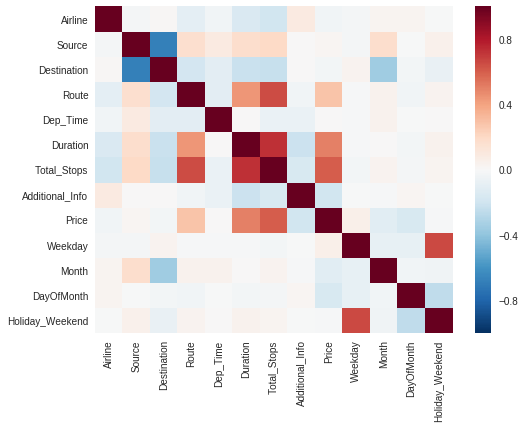

In [ ]:
corr=data.corr()
fig,ax=plt.subplots(figsize=(8,6))
display(corr['Price'])
sns.heatmap(corr)

## **Feature Analysis**

In [ ]:
# Feature Importance with Extra Trees Regressor
from sklearn.ensemble import ExtraTreesRegressor
Y = data.Price
data.drop(['Price'],axis=1,inplace=True)
X=data
model = ExtraTreesRegressor()
model.fit(X, Y)
print(model.feature_importances_)


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.13747126 0.02166687 0.03728916 0.05876017 0.02958333 0.15560745
 0.30884529 0.05810751 0.01889844 0.05852781 0.10190304 0.01333967]


In [ ]:
features=data.columns

In [ ]:
features

Index(['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Duration',
       'Total_Stops', 'Additional_Info', 'Weekday', 'Month', 'DayOfMonth',
       'Holiday_Weekend'],
      dtype='object')

In [ ]:
data

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Weekday,Month,DayOfMonth,Holiday_Weekend
0,3,0,7,0,3,170,0,6,6,3,24,1
1,1,5,0,66,0,445,2,6,2,5,1,1
2,4,3,2,78,1,1159,2,6,6,6,9,1
3,3,5,0,81,3,325,1,6,6,5,12,1
4,3,0,7,81,2,285,1,6,4,3,1,0
5,8,5,0,0,1,145,0,6,0,6,24,0
6,4,0,7,16,3,930,1,5,1,3,12,0
7,4,0,7,16,1,1265,1,6,4,3,1,0
8,4,0,7,16,1,1530,1,5,1,3,12,0
9,6,3,2,16,1,470,1,6,0,5,27,0
